<a href="https://colab.research.google.com/github/KimDoye1109/AI-programming/blob/main/0412_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached 

In [ ]:
!pip install torchsummary #모듈의 정보를 보이게 함

In [ ]:
import numpy as np
import torch

##Data 생성부
- input
- output


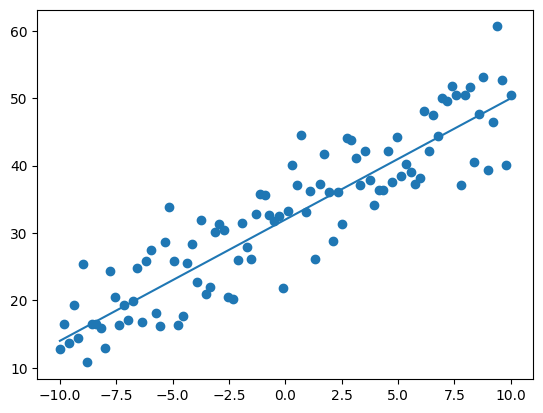

In [105]:
x = np.linspace(-10,10,100)
y_label = 1.8 * x + 32
y = y_label + 8. * np.random.randn(100)

import matplotlib.pyplot as plt

plt.plot(x, y_label)
plt.scatter(x,y)

In [106]:
x = torch.tensor(x).float()
y = torch.tensor(y).float()

print(x.shape)
print(y.shape)

torch.Size([100])
torch.Size([100])


In [144]:
from torch.nn import Module, init, Linear, Parameter,ReLU

## model 제작
model => multiple layer

하나의 layer가 model이라고 부름 이게 model를 나타내기도함

init: 초기화할때 사용, 중요, 잘못사용하면 학습이 발산이 되는 경우 존재

default로 초기화

In [173]:
Linear.mro() #linear의 계층 구조를 보여줌

[torch.nn.modules.linear.Linear, torch.nn.modules.module.Module, object]

https://ds31x.tistory.com/236
 init_으로 하는 것을 권함

In [174]:
class DsLinearModel (Module): #custom module

  def __init__(self, n_in_f, n_out_f): #인스턴스 메소드일 때 self 사용
    super().__init__()
    ##simple approach
    # self.l0 = Linear(n_in_f, 3)#l0는 Linear의 인스턴스 (call of?)
    # self.l1 = Linear(3, n_out_f)

    # # 특정 tensor로 초기화하는 방법
    # init_w = torch.ones(1,1)
    # init_b = torch.zeros(1)
    # self.l0 = Linear(n_in_f, n_out_f)
    # self.l0.weight = Parameter(init_w)
    # self.l0.bias = Parameter(init_b)

    self.l0 = Linear(n_in_f, 32)
    self.relu0 = ReLU()
    self.l1 = Linear(32, 32)
    self.relu1 = ReLU()
    self.l2 = Linear(32, n_out_f)
    with torch.no_grad():
      init.constant_(self.l0.bias, 0.)
      init.xavier_uniform_(self.l0.weight)


  def forward(self,x):
    x = self.l0(x)
    x = self.relu0(x)
    x = self.l1(x)
    x = self.relu1(x)
    y = self.l2(x)
    return y

In [175]:
#Linear에 들어있는 weight과 bias를 알고자 할 때
model = DsLinearModel(1,1)
for idx, c in enumerate (model.named_parameters()):
  print(idx,c)

0 ('l0.weight', Parameter containing:
tensor([[ 0.0393],
        [-0.0932],
        [ 0.1742],
        [-0.4214],
        [-0.4151],
        [ 0.1026],
        [ 0.4173],
        [-0.1234],
        [ 0.0751],
        [ 0.2834],
        [-0.0928],
        [-0.3774],
        [ 0.1814],
        [ 0.1031],
        [-0.3694],
        [ 0.2081],
        [-0.2964],
        [-0.3741],
        [ 0.3235],
        [ 0.0459],
        [ 0.4245],
        [-0.0542],
        [-0.1407],
        [ 0.3739],
        [ 0.1082],
        [-0.2950],
        [ 0.4088],
        [-0.2527],
        [-0.2374],
        [-0.1518],
        [-0.3406],
        [-0.2907]], requires_grad=True))
1 ('l0.bias', Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True))
2 ('l1.weight', Parameter containing:
tensor([[ 0.0506,  0.1533, -0.0915,  ...,  0.0412,  0.0733,  0.0950],
        [ 0.0312, -0.0

In [176]:
for idx, cl in enumerate(model.named_children()):
  print(idx,cl)

0 ('l0', Linear(in_features=1, out_features=32, bias=True))
1 ('relu0', ReLU())
2 ('l1', Linear(in_features=32, out_features=32, bias=True))
3 ('relu1', ReLU())
4 ('l2', Linear(in_features=32, out_features=1, bias=True))


In [177]:
#for idx, modu in enumerate(name_model.modules()):
for idx, modu in enumerate(model.modules()):
  print(idx, modu)

0 DsLinearModel(
  (l0): Linear(in_features=1, out_features=32, bias=True)
  (relu0): ReLU()
  (l1): Linear(in_features=32, out_features=32, bias=True)
  (relu1): ReLU()
  (l2): Linear(in_features=32, out_features=1, bias=True)
)
1 Linear(in_features=1, out_features=32, bias=True)
2 ReLU()
3 Linear(in_features=32, out_features=32, bias=True)
4 ReLU()
5 Linear(in_features=32, out_features=1, bias=True)


In [178]:
x = x.reshape(-1,1)
x.shape

torch.Size([100, 1])

In [179]:
y_pred = model(x)

In [180]:
y_pred

tensor([[ 0.1216],
        [ 0.1181],
        [ 0.1146],
        [ 0.1112],
        [ 0.1077],
        [ 0.1042],
        [ 0.1008],
        [ 0.0973],
        [ 0.0938],
        [ 0.0904],
        [ 0.0869],
        [ 0.0834],
        [ 0.0798],
        [ 0.0763],
        [ 0.0727],
        [ 0.0691],
        [ 0.0656],
        [ 0.0619],
        [ 0.0581],
        [ 0.0543],
        [ 0.0506],
        [ 0.0468],
        [ 0.0432],
        [ 0.0396],
        [ 0.0360],
        [ 0.0324],
        [ 0.0288],
        [ 0.0252],
        [ 0.0216],
        [ 0.0180],
        [ 0.0138],
        [ 0.0096],
        [ 0.0060],
        [ 0.0020],
        [-0.0020],
        [-0.0061],
        [-0.0099],
        [-0.0132],
        [-0.0166],
        [-0.0200],
        [-0.0239],
        [-0.0277],
        [-0.0316],
        [-0.0345],
        [-0.0341],
        [-0.0338],
        [-0.0326],
        [-0.0301],
        [-0.0246],
        [-0.0186],
        [-0.0114],
        [-0.0023],
        [ 0.

In [181]:
pred = Linear(1,1)(x)

In [182]:
pred

tensor([[-3.6568],
        [-3.5899],
        [-3.5231],
        [-3.4563],
        [-3.3894],
        [-3.3226],
        [-3.2557],
        [-3.1889],
        [-3.1221],
        [-3.0552],
        [-2.9884],
        [-2.9215],
        [-2.8547],
        [-2.7879],
        [-2.7210],
        [-2.6542],
        [-2.5874],
        [-2.5205],
        [-2.4537],
        [-2.3868],
        [-2.3200],
        [-2.2532],
        [-2.1863],
        [-2.1195],
        [-2.0527],
        [-1.9858],
        [-1.9190],
        [-1.8521],
        [-1.7853],
        [-1.7185],
        [-1.6516],
        [-1.5848],
        [-1.5180],
        [-1.4511],
        [-1.3843],
        [-1.3174],
        [-1.2506],
        [-1.1838],
        [-1.1169],
        [-1.0501],
        [-0.9832],
        [-0.9164],
        [-0.8496],
        [-0.7827],
        [-0.7159],
        [-0.6491],
        [-0.5822],
        [-0.5154],
        [-0.4485],
        [-0.3817],
        [-0.3149],
        [-0.2480],
        [-0.

In [183]:
y.shape

torch.Size([100, 1])

In [184]:
y = y.reshape(-1,1)
y

tensor([[12.7314],
        [16.4252],
        [13.7376],
        [19.2463],
        [14.3580],
        [25.3927],
        [10.7852],
        [16.4399],
        [16.5413],
        [15.9693],
        [13.0019],
        [24.4051],
        [20.5014],
        [16.3865],
        [19.3830],
        [17.1106],
        [19.9607],
        [24.8759],
        [16.8386],
        [25.8445],
        [27.5496],
        [18.1784],
        [16.2167],
        [28.7088],
        [33.9113],
        [25.8805],
        [16.3395],
        [17.7487],
        [25.5478],
        [28.3583],
        [22.7716],
        [31.9000],
        [21.0221],
        [21.9676],
        [30.0844],
        [31.3031],
        [30.5054],
        [20.5459],
        [20.2403],
        [25.9557],
        [31.5366],
        [27.8853],
        [26.2150],
        [32.7993],
        [35.8485],
        [35.7091],
        [32.6416],
        [31.8124],
        [32.5721],
        [21.8601],
        [33.2475],
        [40.1233],
        [37.

In [185]:
pred.shape

torch.Size([100, 1])

## loss

In [164]:
from torch.nn import MSELoss

loss_func = MSELoss()

l = loss_func(pred,y)
l

tensor(1320.4185, grad_fn=<MseLossBackward0>)

## training Loop

In [165]:
p= model(x)


In [166]:
from torch import optim


def training_loop(
    x, y,
    model,
    lr,
    optimizer, #optimizer type
    n_epochs, #
    ):

  model.train()
#model.eval
  optimizer = optim.SGD(
    model.parameters(),
)
  for epoch in range(n_epochs):

    pred = model(x)
    l = loss_func(pred, y)

    if torch.isinf(l).any():

      print("Error :diverge!")
      break

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 1000 == 0 :
      print(f"Epoch {epoch} : Loss {float(l):0.4f} ")

  return model

In [167]:
# from torch import optim

# def training_loop(
#   x,y,
#   model,
#   lr,
#   optimizer,
#   n_epochs,
#   ):
#   model.train() #train모델로 설정
#   # model.eval()
#   # optimizer = optim.SGD(
#   #     model.parameters(),
#   # )

#   for epoch in range(n_epochs):
#     print(epoch)
#     pred = model(x)
#     l = loss_func(pred,y)
#     if torch.isinf(l).any():
#       print('Error: diverge!')
#       break

#     optimizer.zero_grad()
#     l.backward()
#     optimizer.step()

#     if epoch % 1000 == 0:
#       print(f'Epoch {epoch}: Loss{float(l):0.4f}')

#   return model

In [168]:
model = training_loop(
    x,y,
    model,
    1e-3,
    optimizer,
    7000,
)

Epoch 0 : Loss 1178.2622 
Epoch 1000 : Loss 24.2140 
Epoch 2000 : Loss 23.7517 
Epoch 3000 : Loss 23.6498 
Epoch 4000 : Loss 23.5714 
Epoch 5000 : Loss 23.5379 
Epoch 6000 : Loss 23.5091 


## train

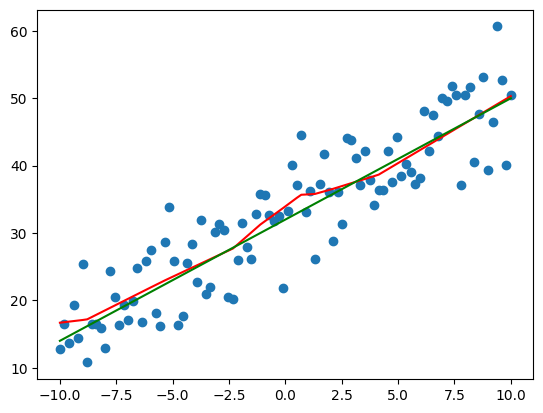

In [169]:
pred = model(x)

plt.scatter(x.detach().numpy(),y.detach().numpy())
plt.plot(x.detach().numpy(),pred.detach().numpy(),color = 'r')
plt.plot(x.detach().numpy(),y_label, color = 'g')

In [170]:
# model = training_loop(
#     x,y,
#     Linear(1,1),
#     1e-3,
#     7000,
# )

In [171]:
# pred = model(x)

# plt,plot(x,pred)

##evaluation

In [172]:
from torchsummary import summary
summary(model,(1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]              64
              ReLU-2                   [-1, 32]               0
            Linear-3                   [-1, 32]           1,056
              ReLU-4                   [-1, 32]               0
            Linear-5                    [-1, 1]              33
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------
